In [3]:
from lib.statistics import Statistics, load_logs, stats_to_numpy

log_dir = open("last_log.tmp.txt", 'r').read().strip()
print(log_dir)

pars, stats = load_logs(log_dir)


./logs/s1611661132.0538187


# Plots of the last simulation run

In [4]:
%pylab
%matplotlib inline
from scipy.stats import entropy

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [27]:
s, bc, sc, ss = stats[-1].to_numpy(pars)
x = np.arange(s)*pars.resolution

## Progress of boid count and school count.

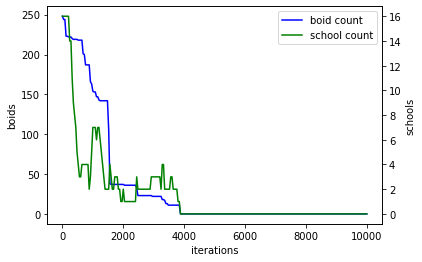

In [30]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, bc, c='b', label='boid count')
ax2 = ax.twinx()
ax2.plot([],[], c='b', label='boid count')
ax2.plot(x, sc, c='g', label='school count')
ax2.legend()
ax.set_xlabel("iterations")
ax.set_ylabel(r"boids")
ax2.set_ylabel(r"schools")
plt.show()

## Progress of the spread of fish across different schools

(cuttoff when there are no more boids)

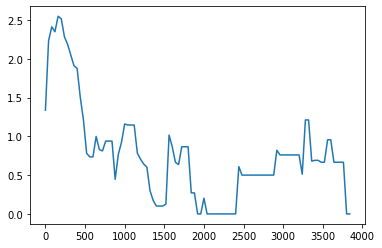

In [45]:
nom = (ss+1)*(ss != 0)
denom = ss.sum(axis=1) + np.sum(ss != 0, axis=1)
ssen = entropy(nom / denom[:, None], axis=1)
plt.plot(x, ssen)

A high value means the fish are spread a lot accross different schools, a low value means they are concentrated in a few big schools.

# Average plots across all simulations with the same parameters

(run more simulations with the same log_dir and the same parameters first)

In [64]:
s, bc, sc, ss = stats_to_numpy(stats, pars)
print("Number of simulations: " + str(bc.shape[0]))

bc = np.mean(bc, axis=0)
sc = np.mean(sc, axis=0)
ss = np.mean(ss, axis=0)


Number of simulations: 1


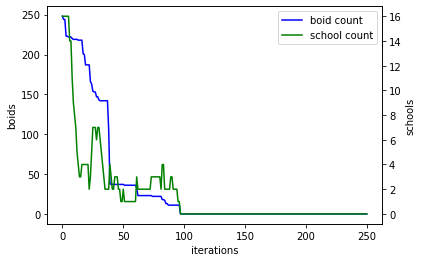

In [58]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, bc, c='b', label='boid count')
ax2 = ax.twinx()
ax2.plot([],[], c='b', label='boid count')
ax2.plot(x, sc, c='g', label='school count')
ax2.legend()
ax.set_xlabel("iterations")
ax.set_ylabel(r"boids")
ax2.set_ylabel(r"schools")
plt.show()

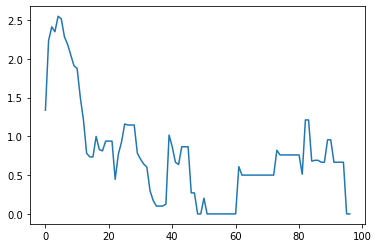

In [59]:
nom = (ss+1)*(ss != 0)
denom = ss.sum(axis=1) + np.sum(ss != 0, axis=1)
ssen = entropy(nom / denom[:, None], axis=1)
plt.plot(x, ssen)

In [60]:
import pprint

pprint.pprint(pars.to_dict())

{'agility': 0.2,
 'alignment_range': 0.8,
 'alignment_weight': 0.28,
 'boid_count': 250,
 'cluster_method': 'LARS_CLUSTERING',
 'cohesion_range': 0.85,
 'cohesion_weight': 0.14,
 'max_steps': 10000,
 'obstacle_range': 0.9,
 'obstacle_weight': 15.0,
 'resolution': 40,
 'separation_range': 0.4,
 'separation_weight': 200.0,
 'shape': [10, 7],
 'shark_agility': 0.1,
 'shark_charge_speed': 0.075,
 'shark_chase_duration': 30,
 'shark_chase_range': 0.5,
 'shark_cohesion_range': 8.0,
 'shark_cohesion_weight': 20.0,
 'shark_cooldown_duration': 20,
 'shark_count': 5,
 'shark_eaten_speed': 0.015,
 'shark_range': 1.4000000000000001,
 'shark_separation_range': 1.0,
 'shark_separation_weight': 20.0,
 'shark_speed': 0.02,
 'shark_top_zoveel': 10,
 'shark_weight': 15.0,
 'shark_wonder_speed': 0.025,
 'speed': 0.03,
 'speedup_lower_threshold': 10,
 'speedup_upper_threshold': 100,
 'wall_range': 0.75,
 'wall_weight': 100}
